In [ ]:
## for data
import pandas as pd
import numpy as np
import io
from sklearn import model_selection
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Prompts to upload csv file and uploads it to pandas dataframe
from google.colab import files
uploaded = files.upload()

# Read in data set to pandas
# dtf = pd.read_csv('ModelNet10_Split.csv')
# dtf = dtf.drop(columns = 'Unnamed: 0')

dtf = pd.read_csv('ModelNet10_Split.csv')
# dtf = dtf.drop(columns = 'Unnamed: 0')


###################################################################
'Add another chart to break down the test / train split per object'
###################################################################

# Split into train set and test set
dtf_train, dtf_test = dtf[dtf['split'] == 'train'], dtf[dtf['split'] == 'test']


# Displaying training set
# print(dtf_train)

Saving ModelNet10_Split.csv to ModelNet10_Split (1).csv


class_bathtub    124
class_bed        492
class_chair      791
class_desk       228
class_dresser    228
class_monitor    452
class_night      228
class_sofa       624
class_table      393
class_toilet     355
dtype: int64
bathtub:    	21|79
bed:    	20|80
chair:    	20|80
desk:    	20|80
dresser:    	20|80
monitor:    	20|80
night:    	20|80
sofa:    	20|80
table:    	20|80
toilet:    	20|80


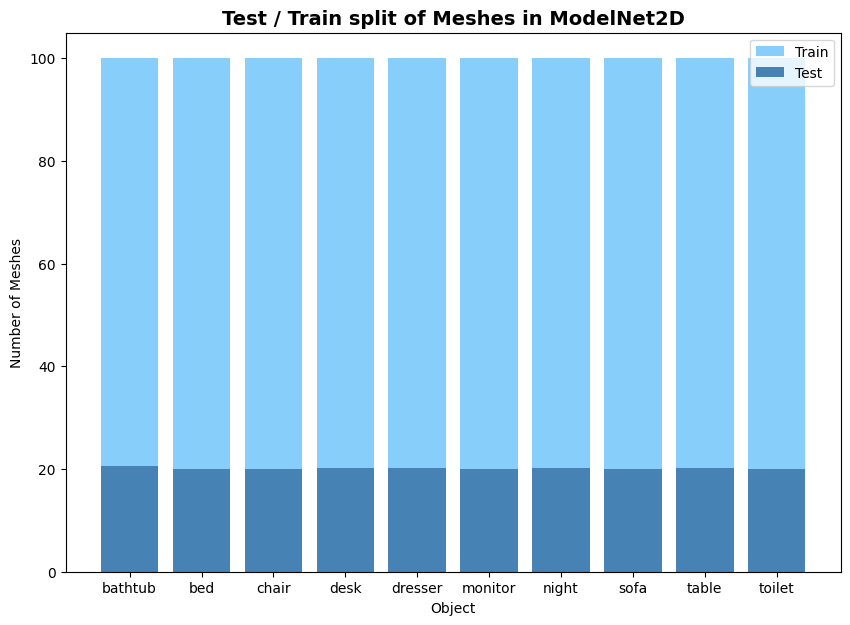

In [ ]:
from numpy.matrixlib import test
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

dummy = pd.get_dummies(dtf_train["class"], prefix="class")
dtf_train= pd.concat([dtf_train, dummy], axis=1)

dummy_test = pd.get_dummies(dtf_test["class"], prefix="class")
dtf_test= pd.concat([dtf_test, dummy_test], axis=1)

dtf_train_2 = dtf_train.drop(axis=1, labels=['object_path','split','object_id'], inplace=False)
dummy_2 = pd.get_dummies(dummy, drop_first=True).sum(axis=0, numeric_only=True).head(n=11)
dtf_test_2 = dtf_test.drop(axis=1, labels=['object_path','split','object_id'], inplace=False)
dummy_test_2 = pd.get_dummies(dummy_test, drop_first=True).sum(axis=0, numeric_only=True).head(n=11)

print(dummy_2)
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [
      dummy_2.index[0].rsplit('_')[1],
      dummy_2.index[1].rsplit('_')[1],
      dummy_2.index[2].rsplit('_')[1],
      dummy_2.index[3].rsplit('_')[1],
      dummy_2.index[4].rsplit('_')[1],
      dummy_2.index[5].rsplit('_')[1],
      dummy_2.index[6].rsplit('_')[1],
      dummy_2.index[7].rsplit('_')[1],
      dummy_2.index[8].rsplit('_')[1],
      dummy_2.index[9].rsplit('_')[1]]
      # ]
x2 = [
      dummy_2.index[0].rsplit('_')[1],
      dummy_2.index[1].rsplit('_')[1],
      dummy_2.index[2].rsplit('_')[1],
      dummy_2.index[3].rsplit('_')[1],
      dummy_2.index[4].rsplit('_')[1],
      dummy_2.index[5].rsplit('_')[1],
      dummy_2.index[6].rsplit('_')[1],
      dummy_2.index[7].rsplit('_')[1],
      dummy_2.index[8].rsplit('_')[1],
      dummy_2.index[9].rsplit('_')[1]]
      # ]
y1 = []
y2 = []

for index in range(0, 10):
  y2.append(dummy_2.values[index])
  y1.append(dummy_test_2.values[index] + dummy_2.values[index])

# Colors: https://matplotlib.org/api/colors_api.html

# colors = sns.color_palette("icefire", 1)
# colors2 = sns.color_palette("crest", 1)
colors = 'steelblue'
colors2 = 'lightskyblue'


plt.figure(figsize=(10, 7))

# plt.bar(x1, y1, label="Test", color=colors)
# plt.bar(x2, y2, label="Train", color=colors2)

test = []
train = []
for index in range(10):
  print(x1[index] + ":    \t{:0.0f}".format(100-y2[index] / y1[index] * 100) + "|{:0.0f}".format(y2[index] / y1[index] * 100))
  # print(x1[index] + ": " + round(str(y2[index] / y1[index])))
  test.append(100-y2[index] / y1[index] * 100)
  train.append(100)
plt.bar(x2, train, label="Train", color=colors2)
plt.bar(x1, test, label="Test", color=colors)


plt.plot()



plt.xlabel("Object")
plt.ylabel("Number of Meshes")
plt.title("Test / Train split of Meshes in ModelNet2D", fontdict={'fontsize': 14}, fontweight='bold', loc='center')
plt.legend()
plt.show()

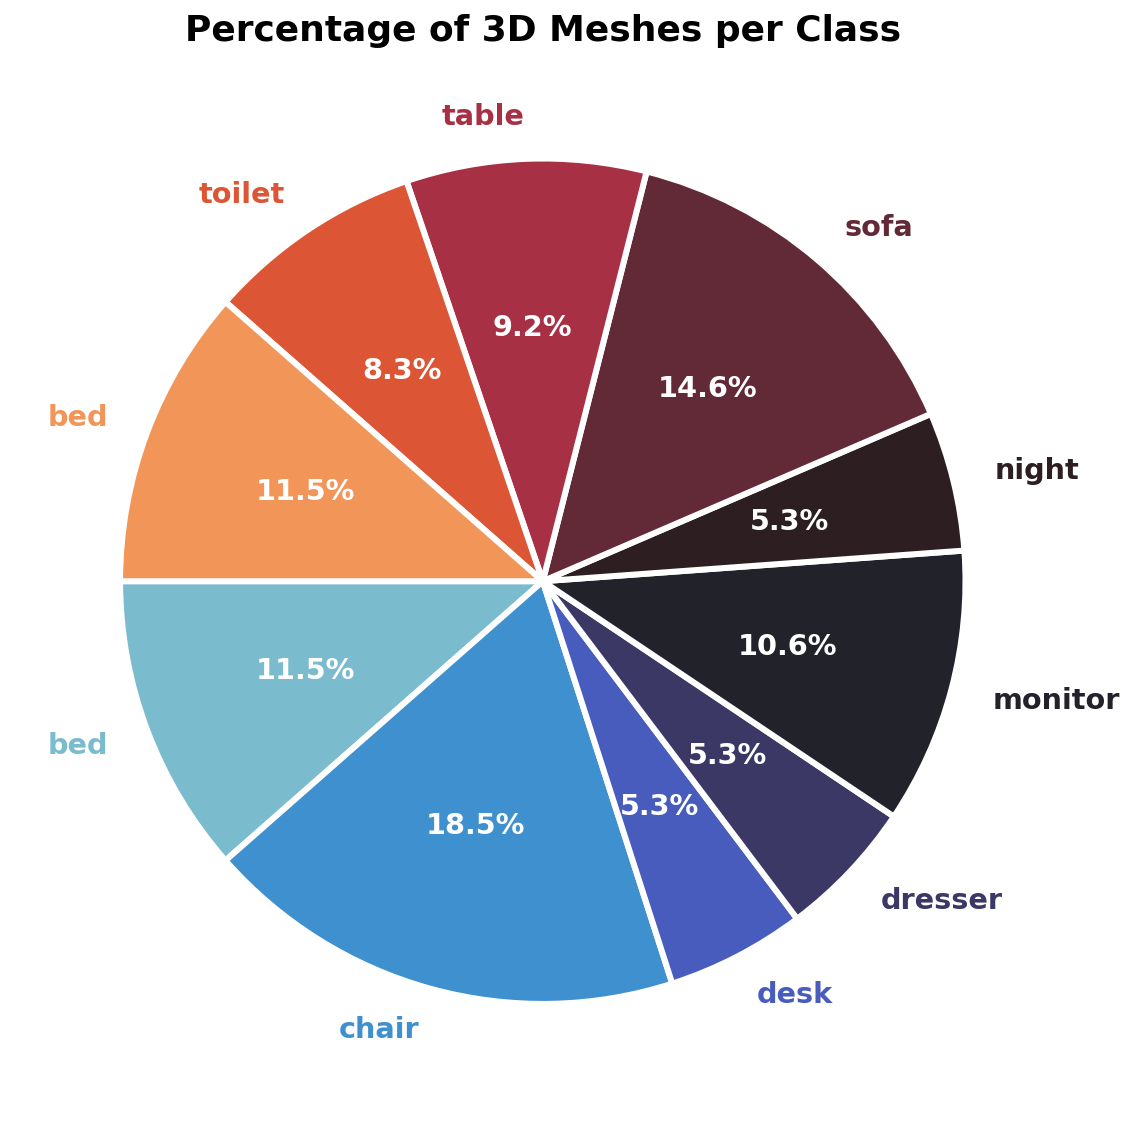

In [ ]:
# Find a way to numerically represent each column of data
# 1. Object_Id -- slot in list
# 2. Class -- assign each class a number 1-10
# 3. Object_path -- *This is individual for each object so idk how to represent this as a numerical item*

# 2. Class -> number

# TRAIN
dummy = pd.get_dummies(dtf_train["class"], prefix="class", drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
# print( dtf_train.filter(like="class", axis=1).head() )
# dtf = dtf_train.drop("class", axis=1)
# TEST
dummy_test = pd.get_dummies(dtf_test["class"], prefix="class", drop_first=True)
dtf_test= pd.concat([dtf_test, dummy_test], axis=1)
# print( dtf_test.filter(like="class", axis=1).head() )
# dtf = dtf_test.drop("class", axis=1)



# print(dtf_train.sum(axis=0,numeric_only=True,))
dtf_train_2 = dtf_train.drop(axis=1, labels=['object_path','split','object_id'], inplace=False)
dummy_2 = pd.get_dummies(dtf_train_2, drop_first=True).sum(axis=0, numeric_only=True).head(n=10)
# print(dummy_2)

# print(dtf_train.sum(axis=0,numeric_only=True,))
dtf_test_2 = dtf_test.drop(axis=1, labels=['object_path','split','object_id'], inplace=False)
dummy_test_2 = pd.get_dummies(dtf_test_2, drop_first=True).sum(axis=0, numeric_only=True).head(n=10)
# print(dummy_test_2)





# Ref. pie chart
# https://colab.research.google.com/drive/11Gd3rmm7TR-ugw4blV6RRko-zf-d6fmF#scrollTo=Lbml2GUfoFIl

# Output in high quality.
%config InlineBackend.figure_format='retina'

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

x = dummy_2.values
labels = [dummy_2.index[0].rsplit('_')[1],
          dummy_2.index[1].rsplit('_')[1],
          dummy_2.index[2].rsplit('_')[1],
          dummy_2.index[3].rsplit('_')[1],
          dummy_2.index[4].rsplit('_')[1],
          dummy_2.index[5].rsplit('_')[1],
          dummy_2.index[6].rsplit('_')[1],
          dummy_2.index[7].rsplit('_')[1],
          dummy_2.index[8].rsplit('_')[1],
          dummy_2.index[9].rsplit('_')[1]]

fig, ax = plt.subplots(figsize=(8, 8))

# Good palettes: crest, mako, icefire,
colors = sns.color_palette("icefire", 10)

patches, texts, pcts = ax.pie(x,
      labels=labels,
      autopct='%1.1f%%',
      wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
      textprops={'size': 'x-large'},
      colors=colors,
      startangle=180)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Percentage of 3D Meshes per Class', fontsize=18, fontweight=600)
plt.tight_layout()

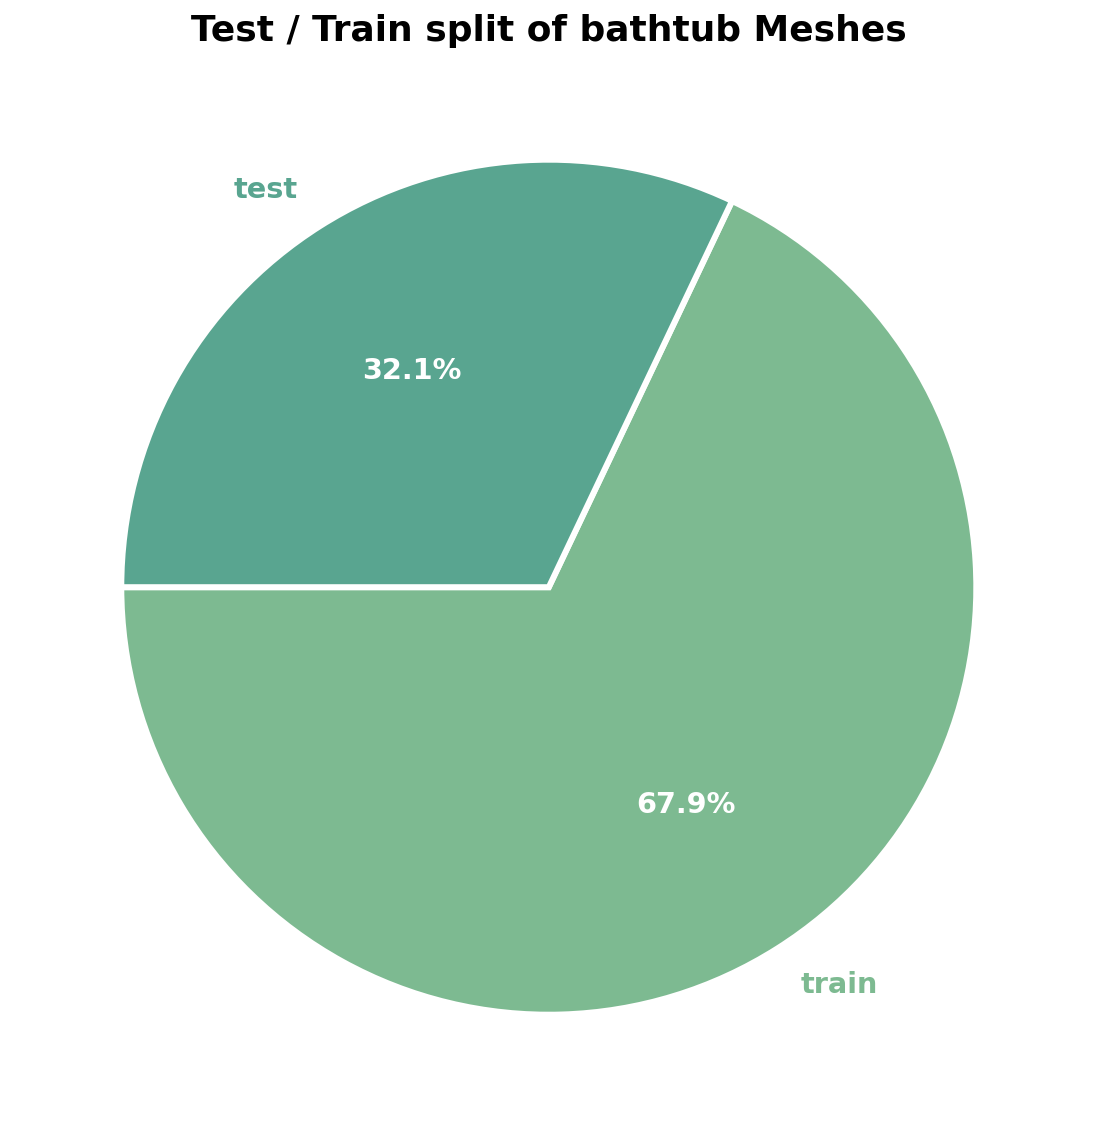

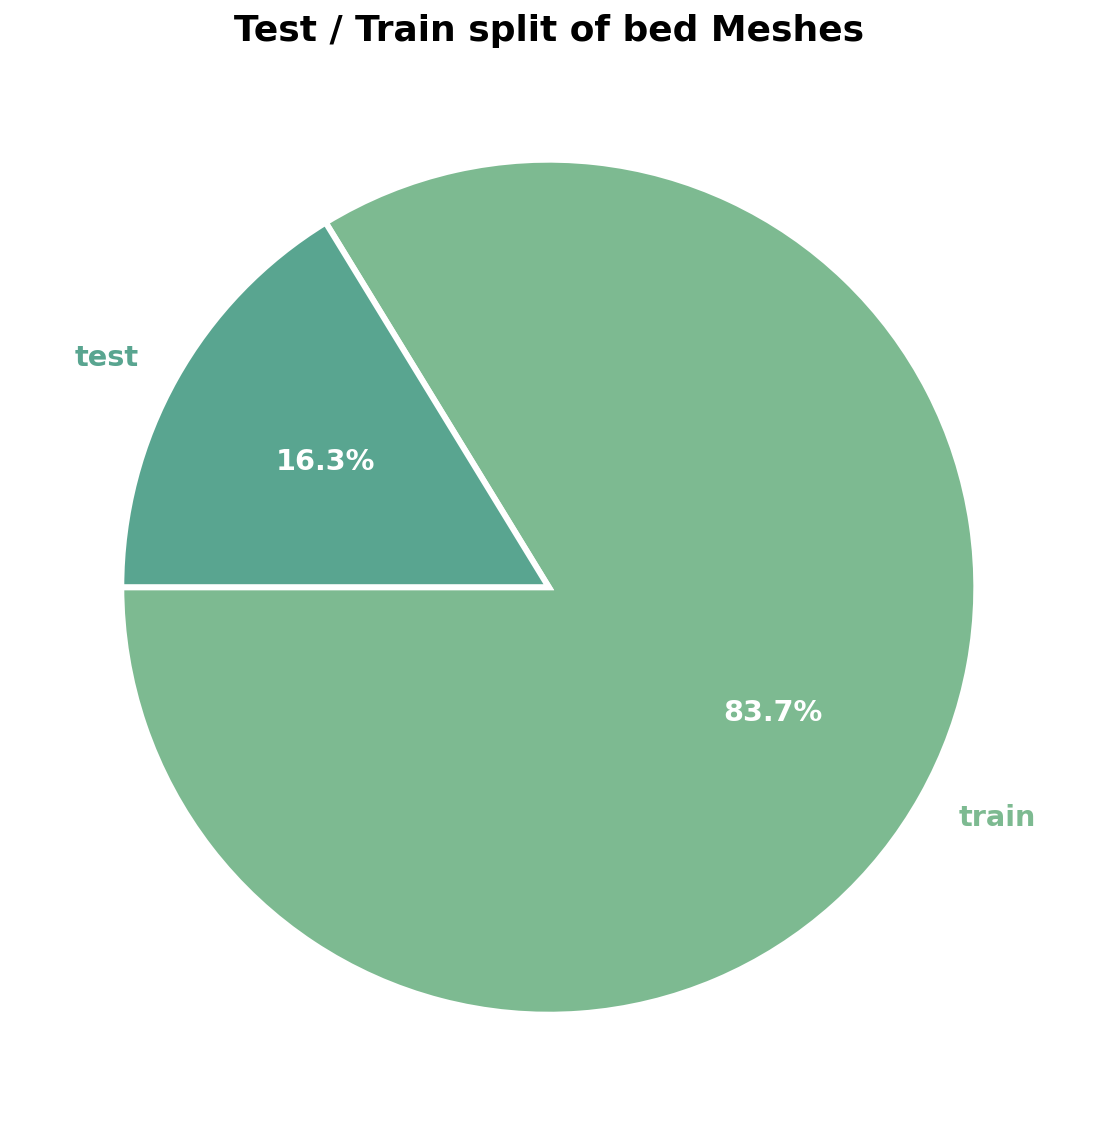

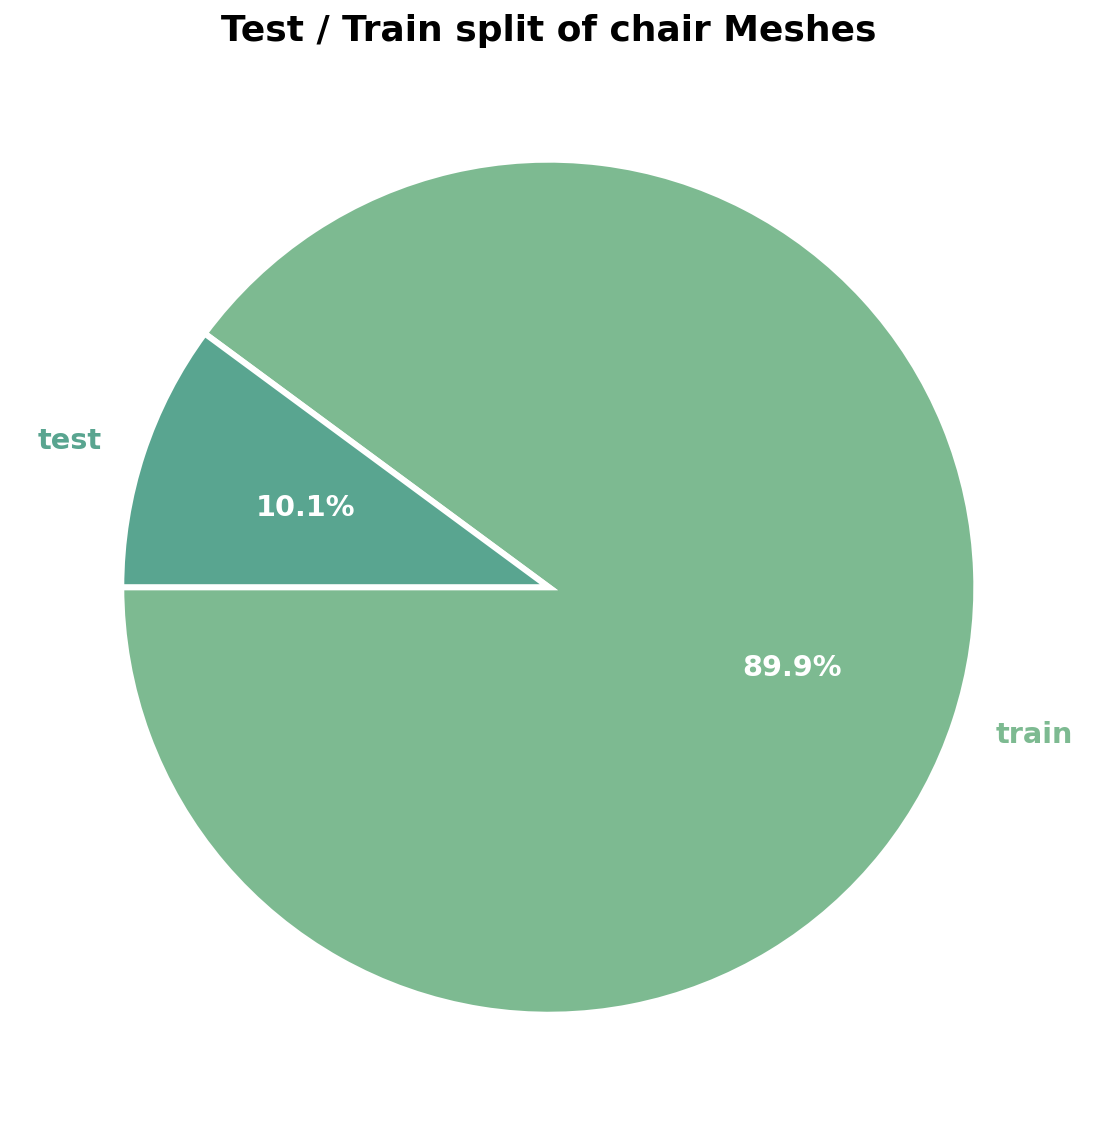

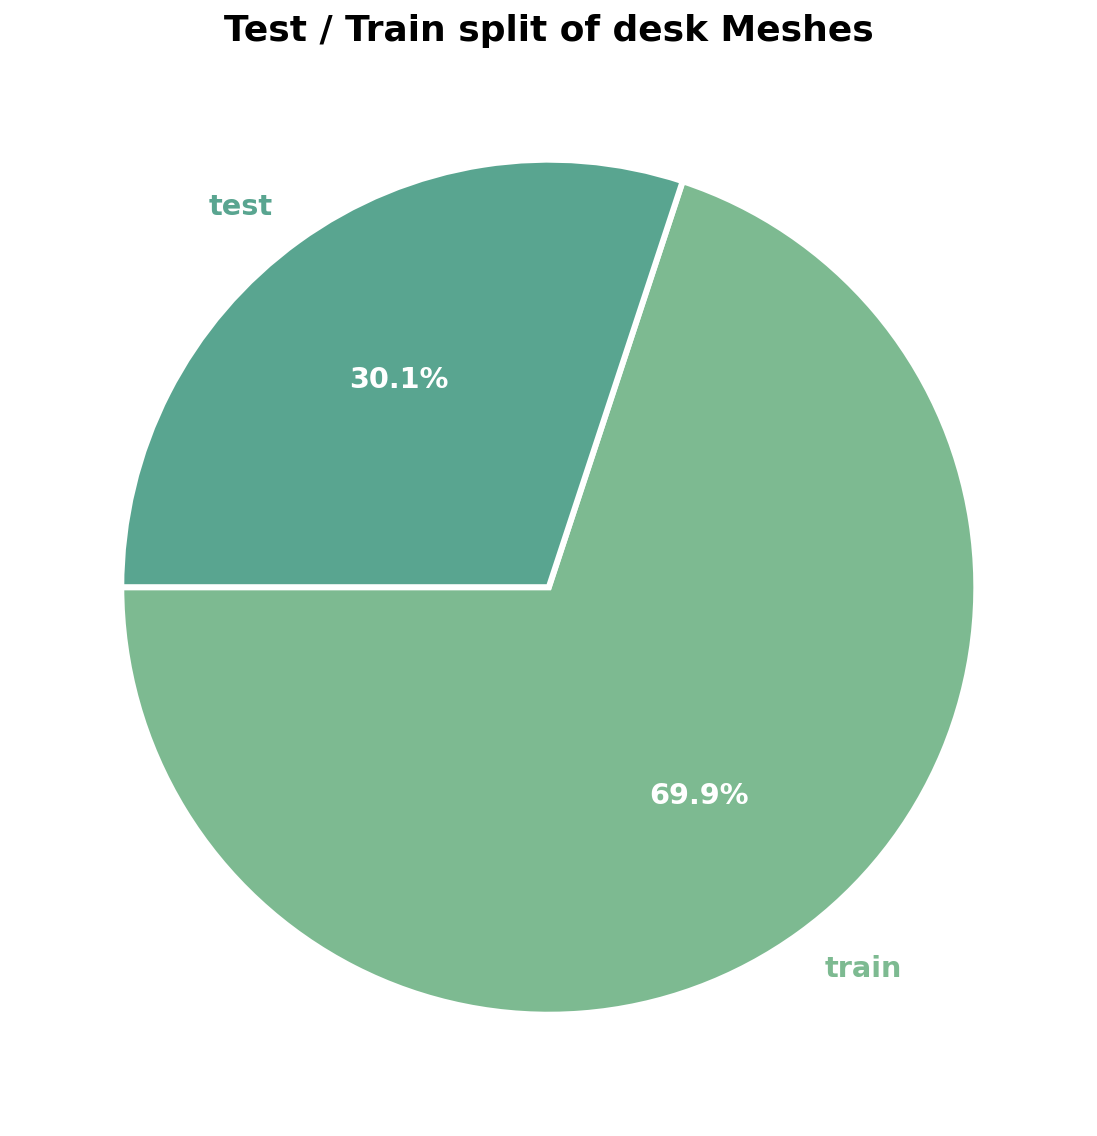

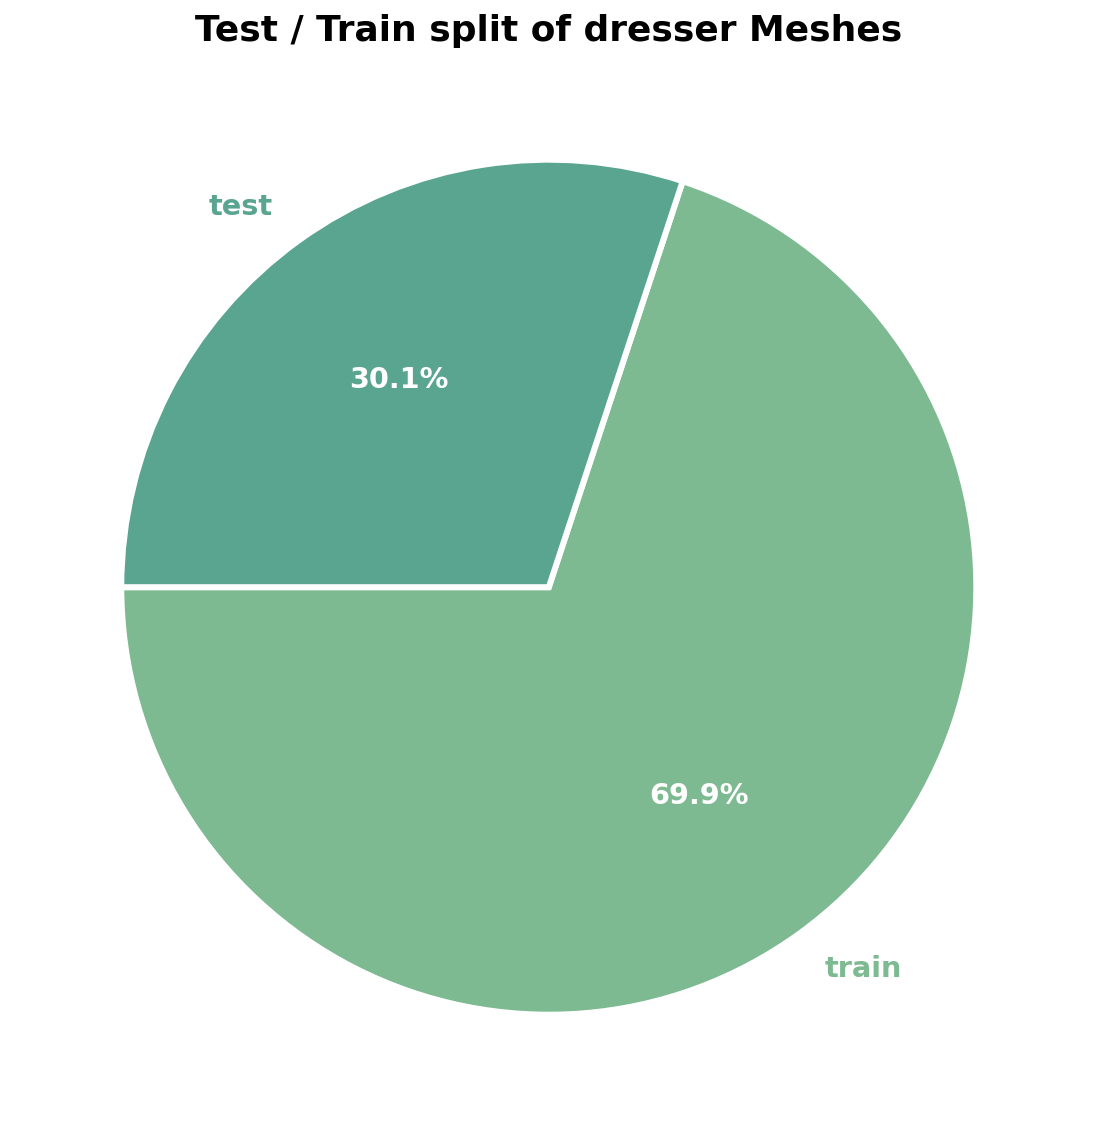

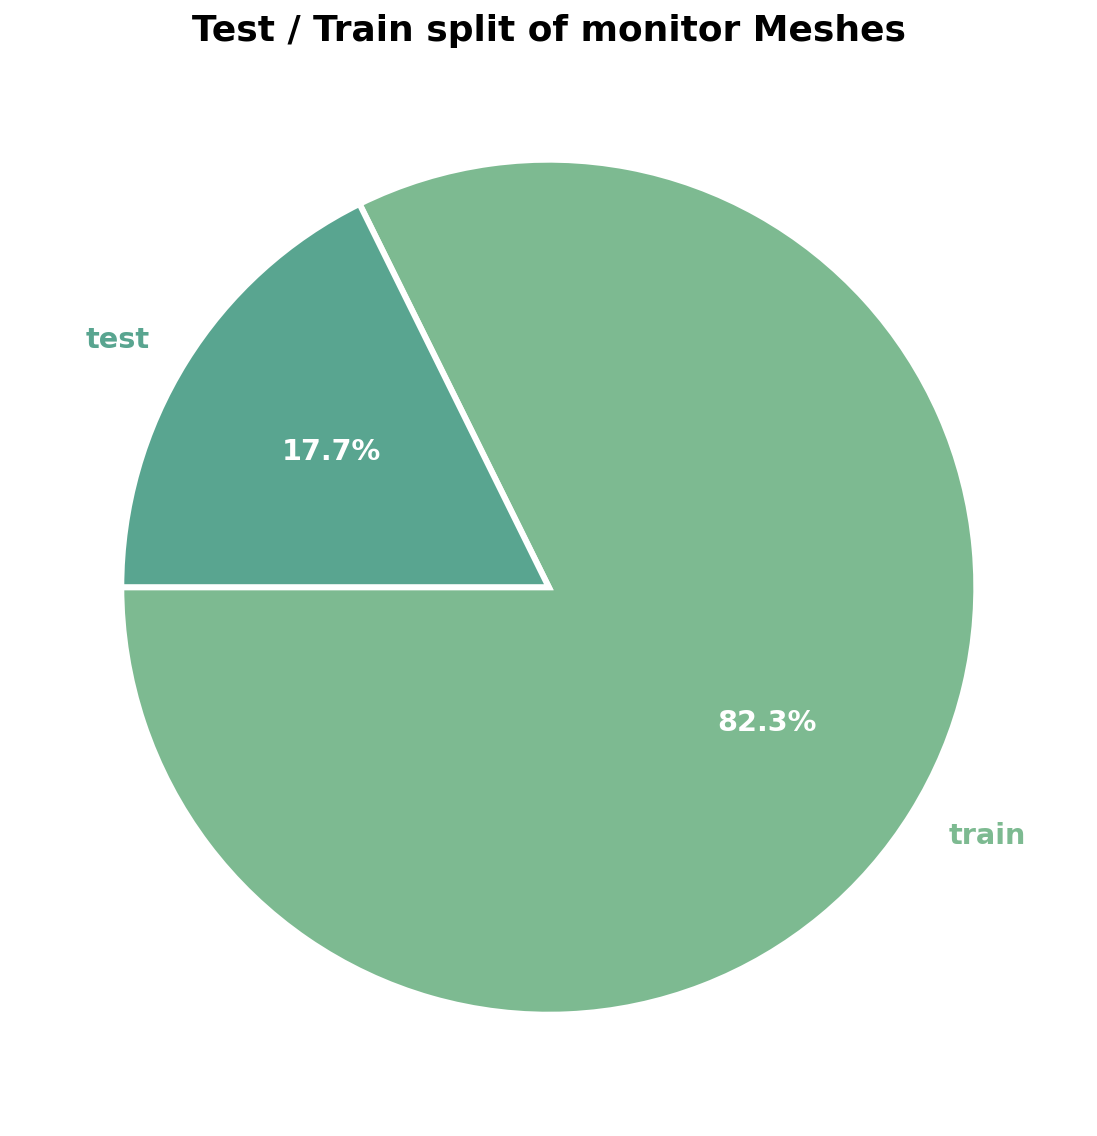

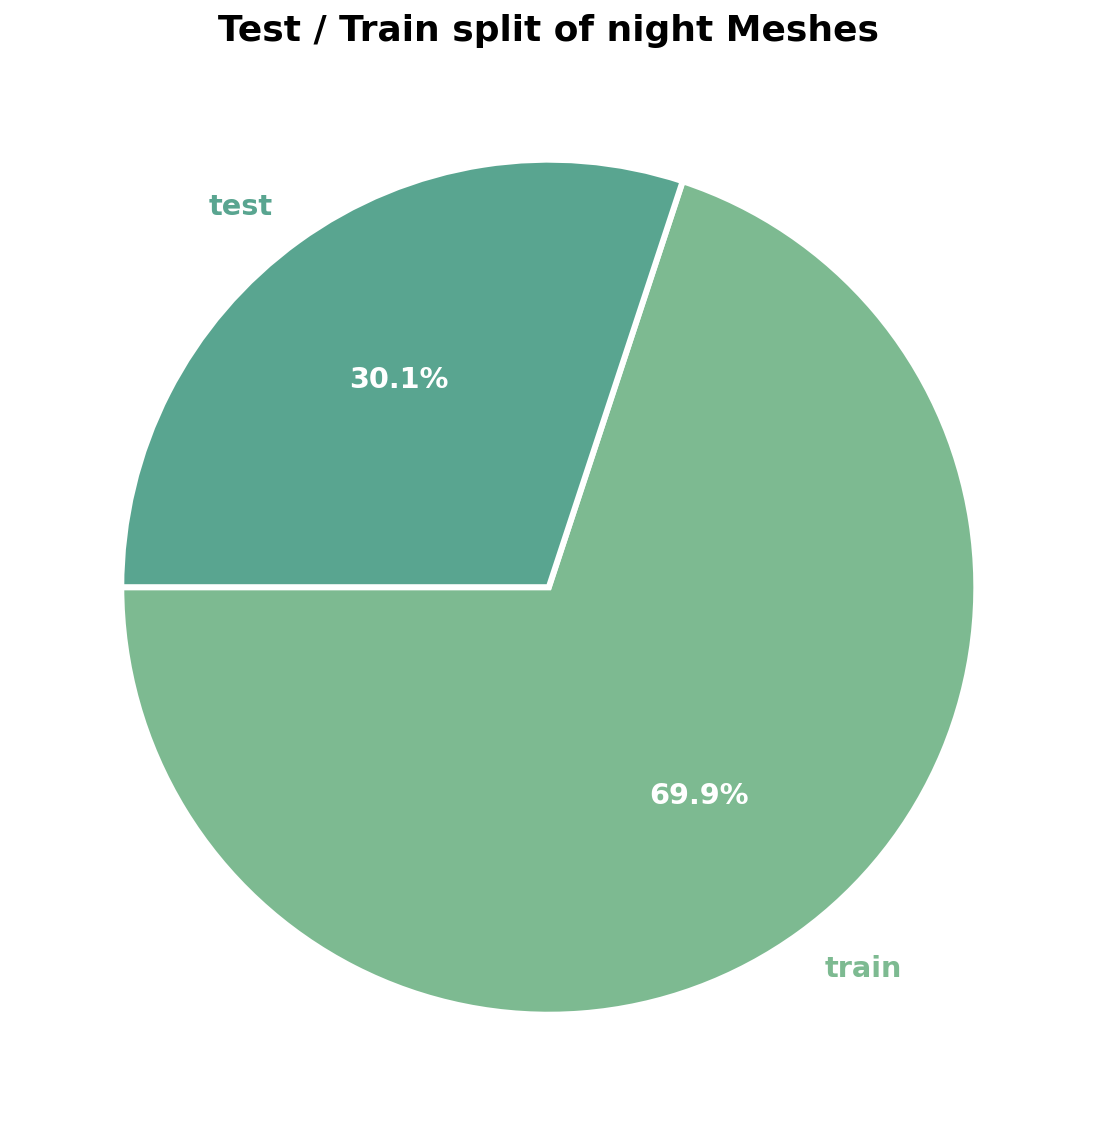

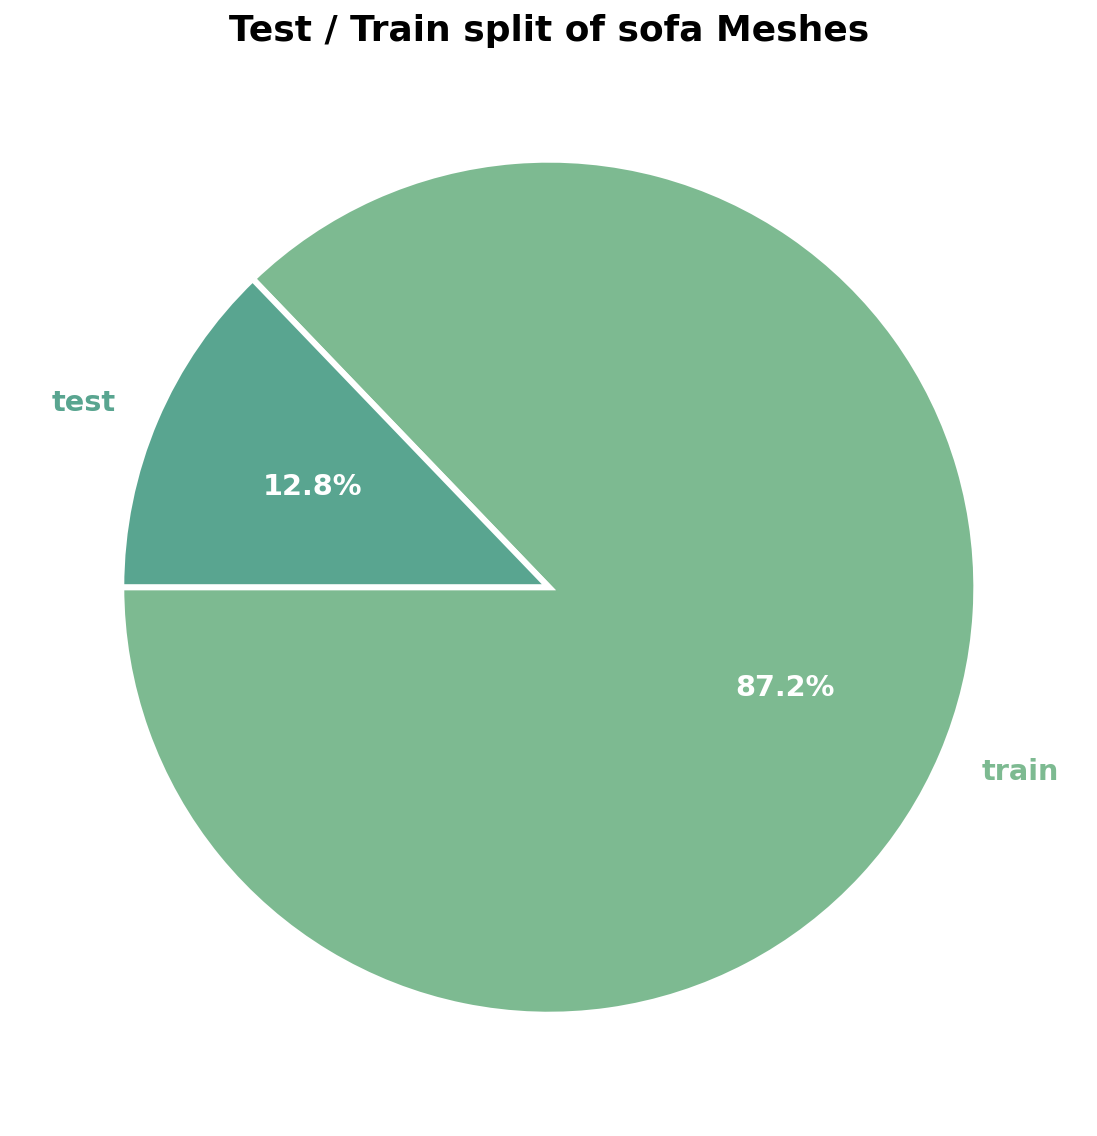

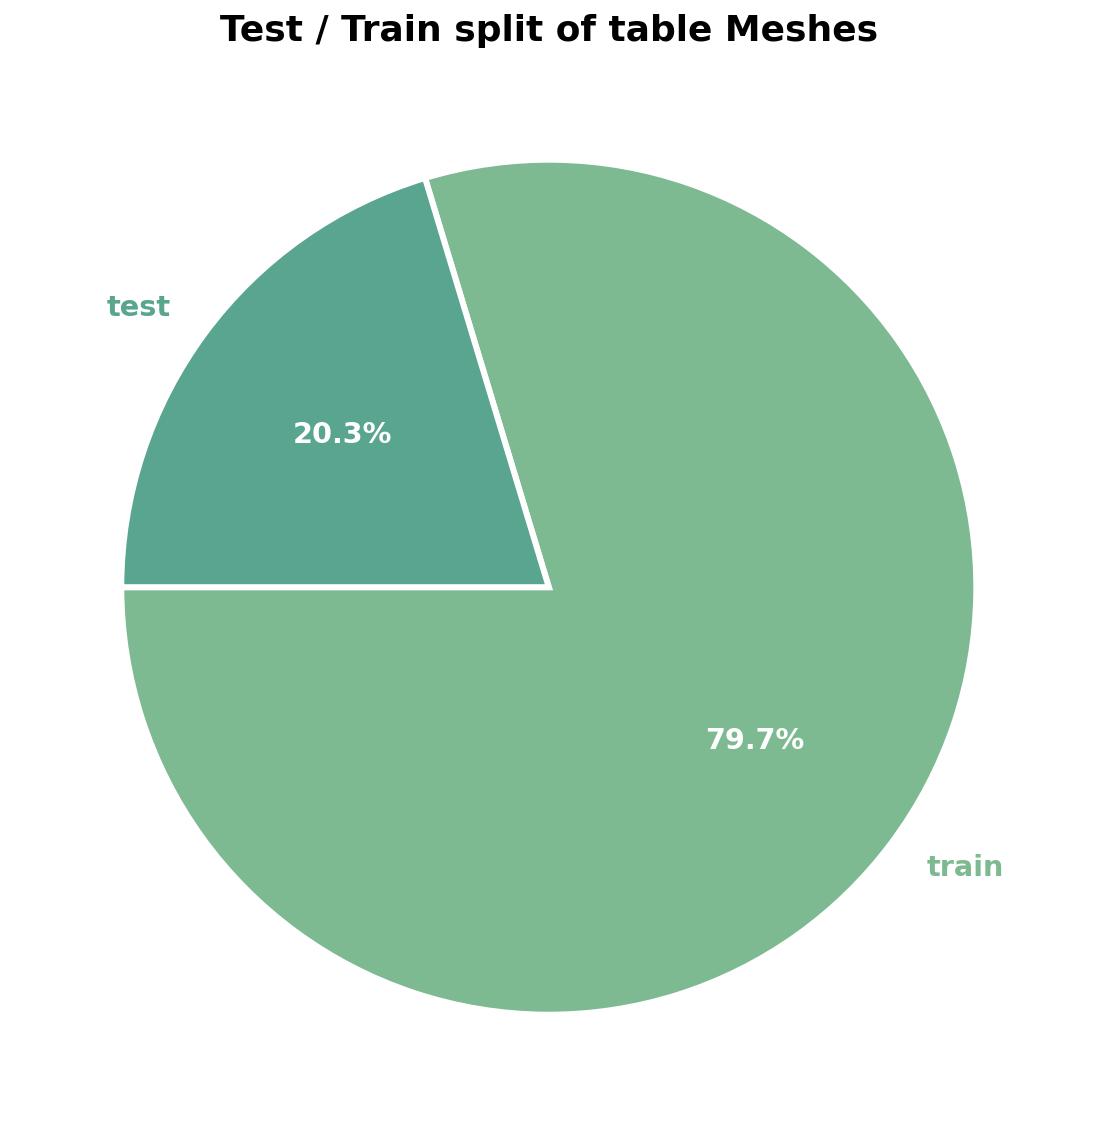

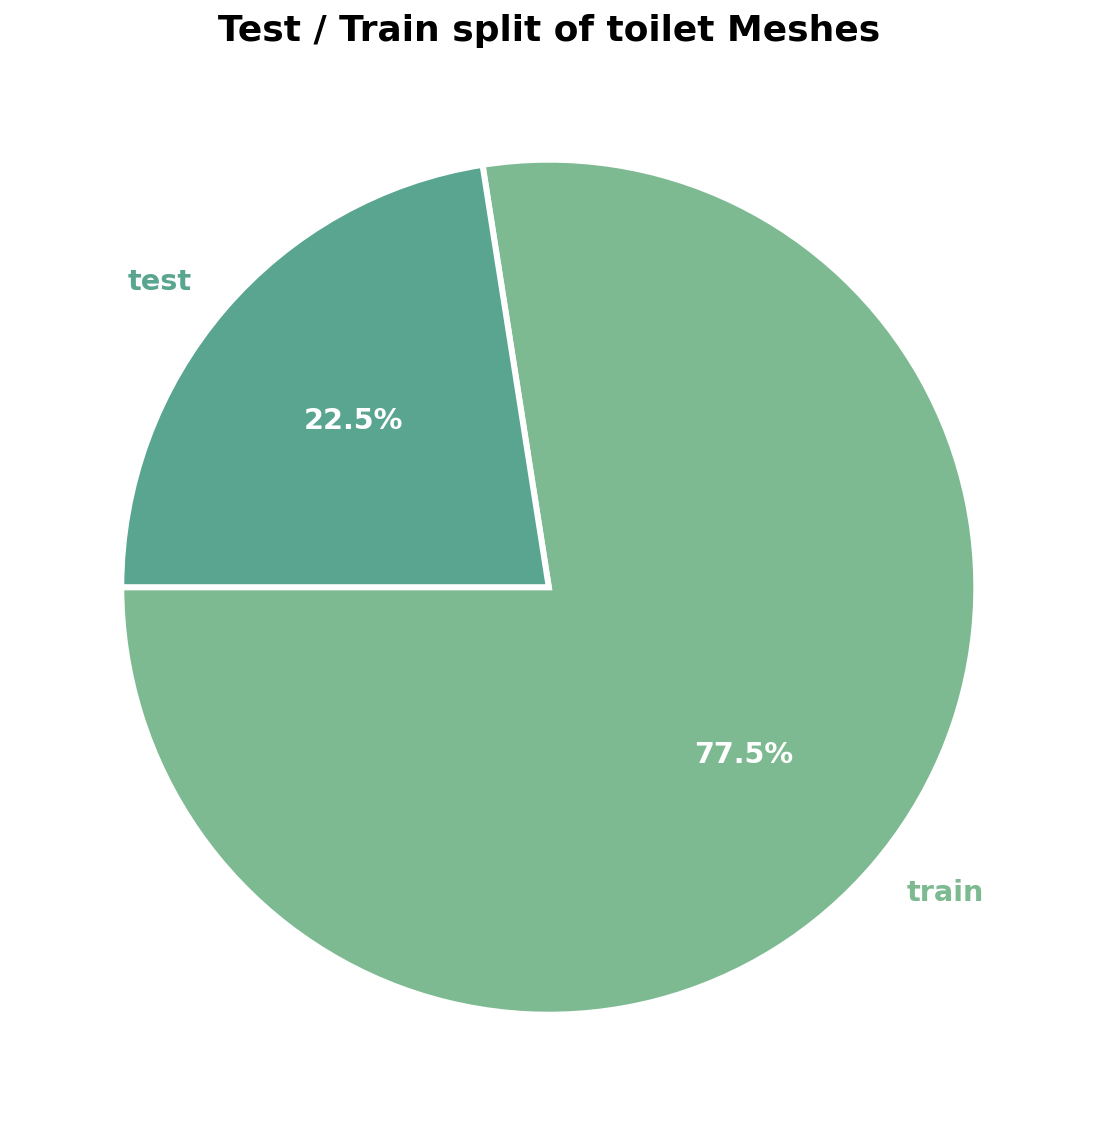

In [ ]:
for index in range(10):

  x = (dummy_2.values[index], dummy_test_2.values[index])
  labels = ('train', 'test')

  fig, ax = plt.subplots(figsize=(8, 8))

  # Good palettes: crest, mako, icefire,
  colors = sns.color_palette("crest")

  patches, texts, pcts = ax.pie(x,
        labels=labels,
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
        textprops={'size': 'x-large'},
        colors=colors,
        startangle=180)

  for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

  plt.setp(pcts, color='white', fontweight='bold')
  plt.setp(texts, fontweight=600)
  ax.set_title('Test / Train split of ' + dummy_2.index[index].rsplit('_')[1] + ' Meshes', fontsize=18, fontweight=600)
  plt.tight_layout()